# Yahoo Finance API

Dependencies: pip install yfinance

In [6]:
from datetime import date
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
import time
import yfinance as yf
pd.options.display.max_rows=1000

In [2]:
def fetch_sp500_table():
    """
    Fetches S&P 500 companies' ticker symbol, name, industry, sub-industry, etc

    Parameters
    ----------
    None

    Returns
    -------
    Pandas dataframe
    
    """
    
    sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
    sp500.columns = [column.replace(' ', '_').replace('-', '_') for column in sp500.columns]
    sp500 = sp500.assign(Symbol_Name=sp500['Symbol'] + ' - ' + sp500['Security'])

    return sp500

In [3]:
def plot_stock_ticker(ticker: str, start_date: str, end_date: str):
    """
    Plots stock ticker historical trend

    Parameters
    ----------
    ticker: str
        stock ticker symbol
    start_date: str
        start date
    end_date: str
        end date

    Returns
    -------
    MATPLOTLIB line chart
    """

    df = yf.download(ticker, start_date, end_date, progress=False)

    sns.lineplot(
        data=df,
        x=df.index,
        y='Adj Close'
    )
    sns.despine()
    plt.xticks(rotation=90, fontsize=8)
    plt.title(f"Adj Close Price - {ticker}")
    plt.grid(visible=True)
    plt.show()

In [4]:
sp500 = fetch_sp500_table()

In [7]:
sp500

Symbol                              Security             GICS_Sector  \
0      MMM                                    3M             Industrials   
1      AOS                           A. O. Smith             Industrials   
2      ABT                                Abbott             Health Care   
3     ABBV                                AbbVie             Health Care   
4      ACN                             Accenture  Information Technology   
5      ADM                                   ADM        Consumer Staples   
6     ADBE                            Adobe Inc.  Information Technology   
7      ADP                                   ADP             Industrials   
8      AES                       AES Corporation               Utilities   
9      AFL                                 Aflac              Financials   
10       A                  Agilent Technologies             Health Care   
11    ABNB                                Airbnb  Consumer Discretionary   
12     APD            Air Products and Chemicals               Materials   
13    AKAM                                Akamai  Information Technology   
14     ALK                      Alaska Air Group             Industrials   
15     ALB                 Albemarle Corporation               Materials   
16     ARE       Alexandria Real Estate Equities             Real Estate   
17    ALGN                      Align Technology             Health Care   
18    ALLE                              Allegion             Industrials   
19     LNT                        Alliant Energy               Utilities   
20     ALL                              Allstate              Financials   
21   GOOGL               Alphabet Inc. (Class A)  Communication Services   
22    GOOG               Alphabet Inc. (Class C)  Communication Services   
23      MO                                Altria        Consumer Staples   
24    AMZN                                Amazon  Consumer Discretionary   
25    AMCR                                 Amcor               Materials   
26     AMD                                   AMD  Information Technology   
27     AEE                                Ameren               Utilities   
28     AAL               American Airlines Group             Industrials   
29     AEP               American Electric Power               Utilities   
30     AXP                      American Express              Financials   
31     AIG          American International Group              Financials   
32     AMT                        American Tower             Real Estate   
33     AWK                  American Water Works               Utilities   
34     AMP                  Ameriprise Financial              Financials   
35     AME                                Ametek             Industrials   
36    AMGN                                 Amgen             Health Care   
37     APH                              Amphenol  Information Technology   
38     ADI                        Analog Devices  Information Technology   
39    ANSS                                 Ansys  Information Technology   
40     AON                                   Aon              Financials   
41     APA                       APA Corporation                  Energy   
42    AAPL                            Apple Inc.  Information Technology   
43    AMAT                     Applied Materials  Information Technology   
44    APTV                                 Aptiv  Consumer Discretionary   
45    ACGL                    Arch Capital Group              Financials   
46    ANET                       Arista Networks  Information Technology   
47     AJG             Arthur J. Gallagher & Co.              Financials   
48     AIZ                              Assurant              Financials   
49       T                                  AT&T  Communication Services   
50     ATO                          Atmos Energy               Utilities   
51    ADSK                              Autodesk  In

In [8]:
end_date = date.today()
start_date = end_date - relativedelta(years=1)
end_date_str = end_date.strftime('%Y-%m-%d')
start_date_str = start_date.strftime('%Y-%m-%d')

#### Plotting single stock ticker ("AAPL - Apple")

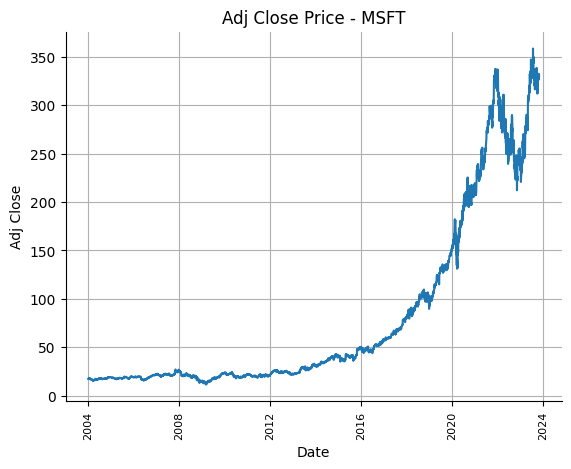

In [9]:
plot_stock_ticker('MSFT','2004-01-01',end_date_str)

#### Plotting multiple stock tickers for specific industry ("Information Technology")

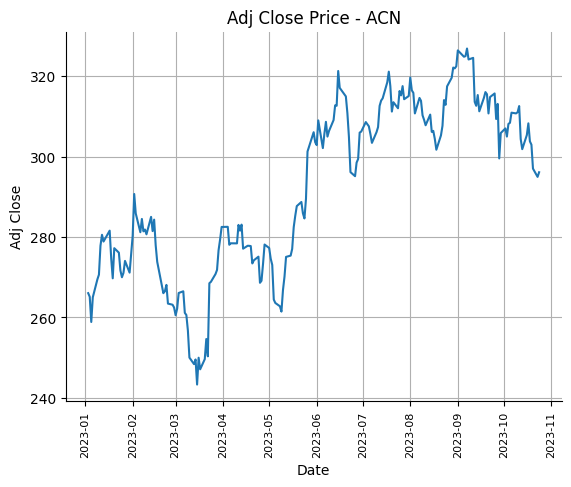

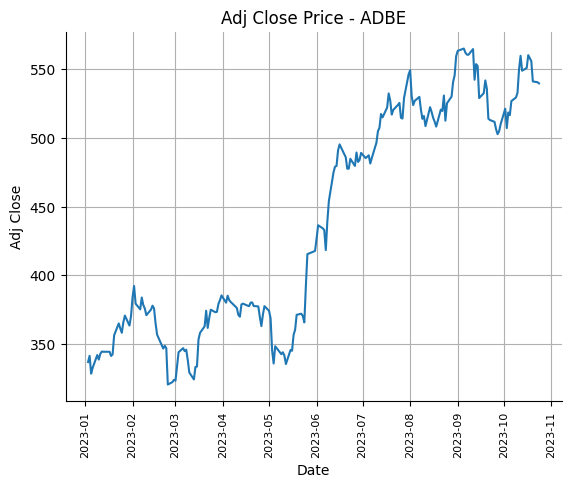

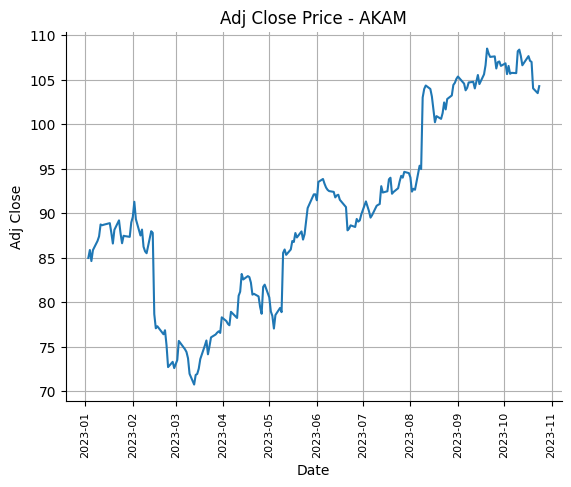

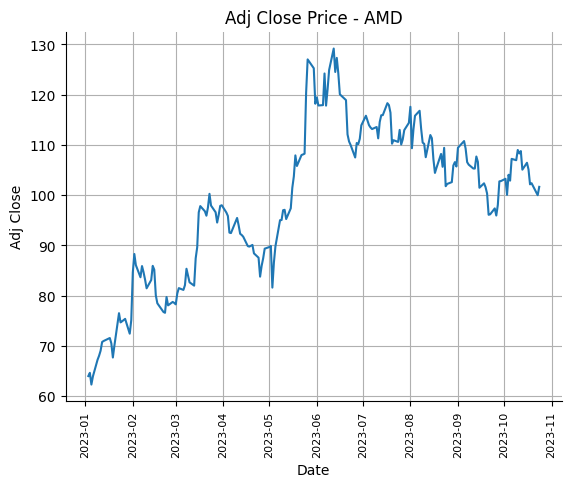

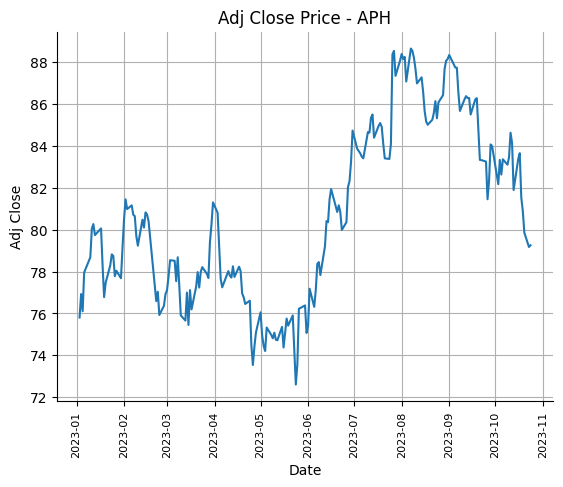

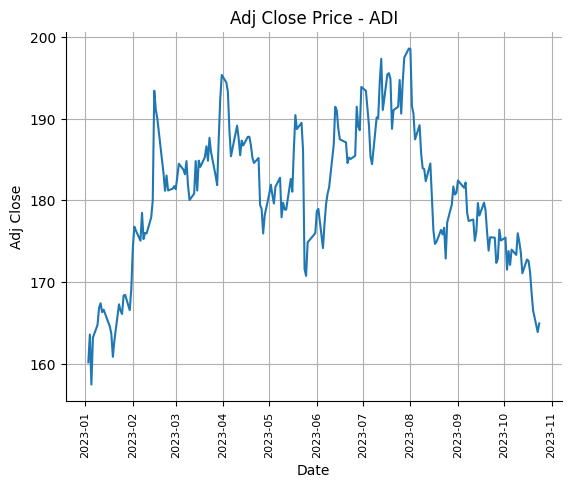

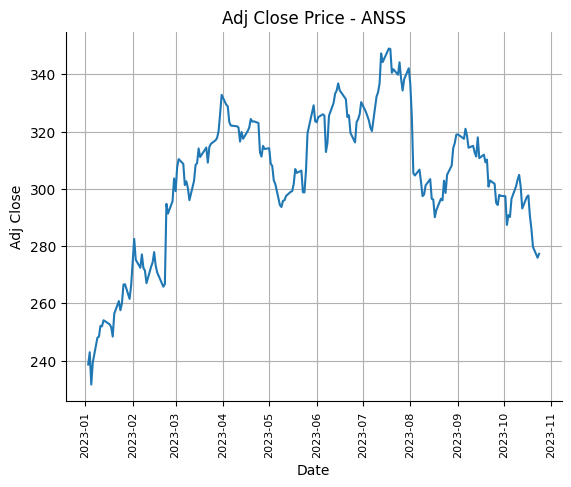

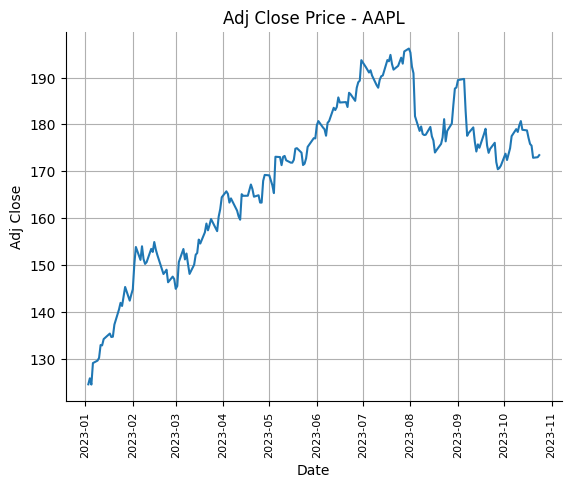

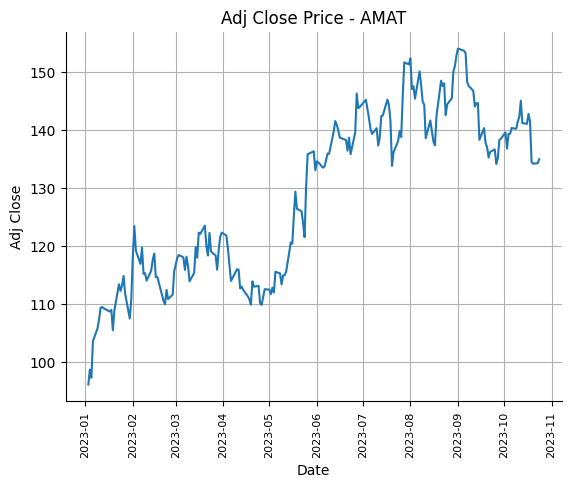

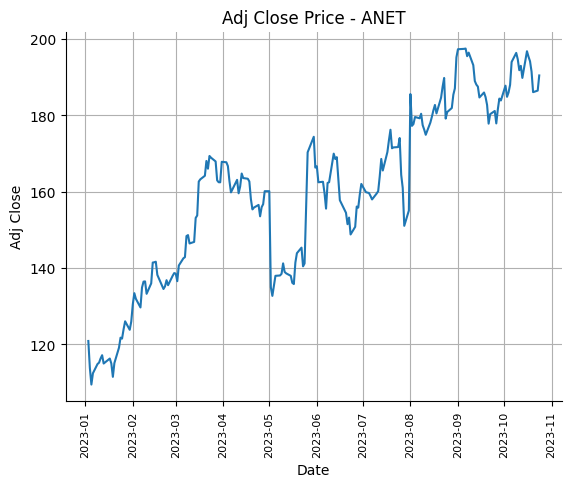

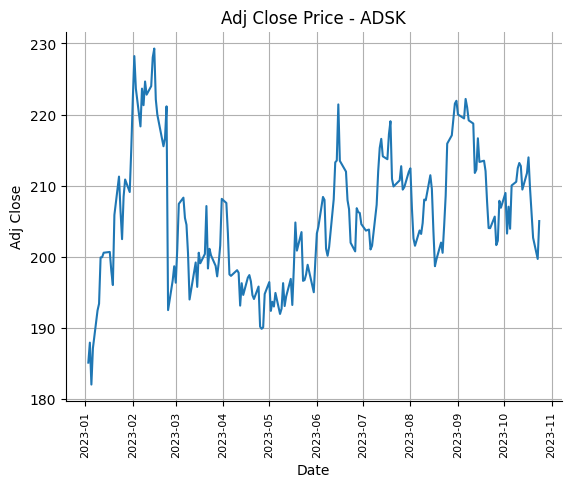

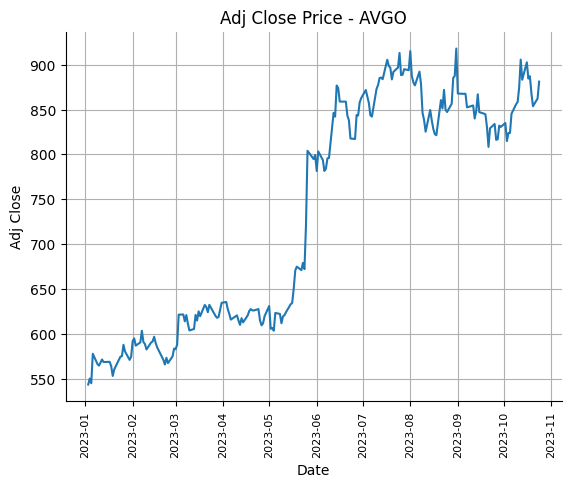

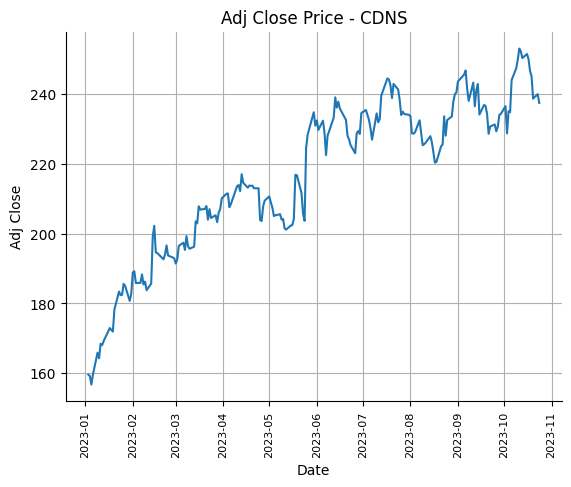

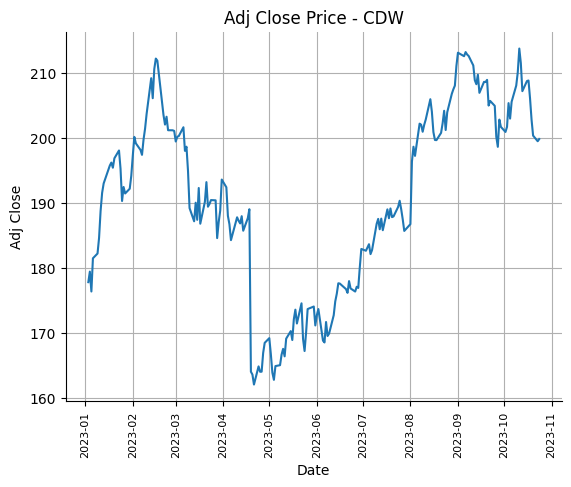

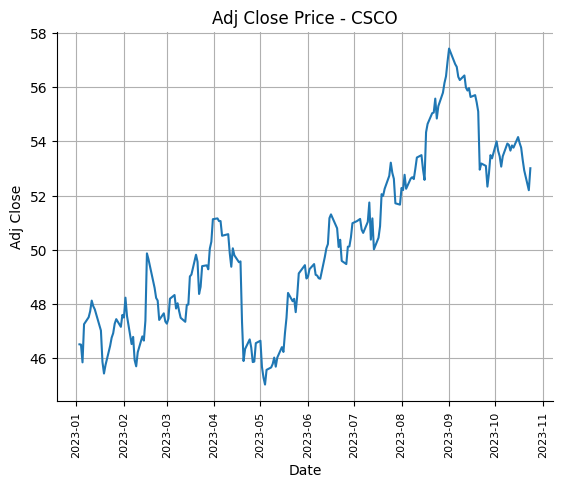

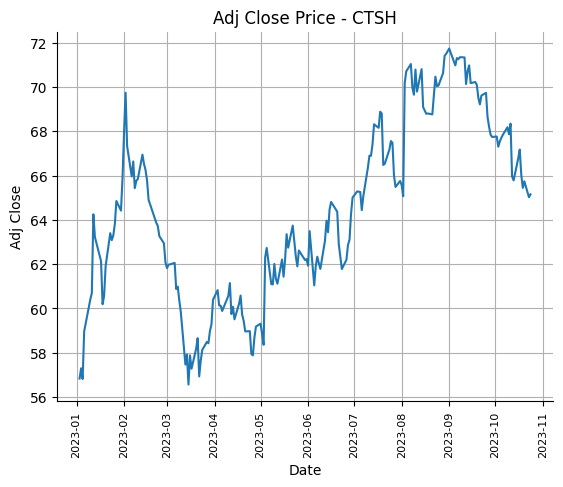

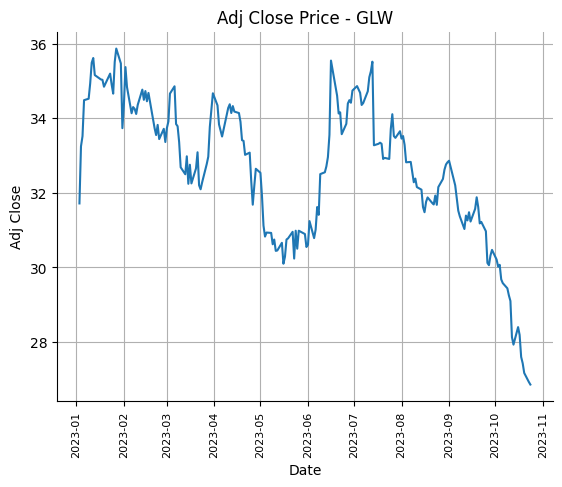

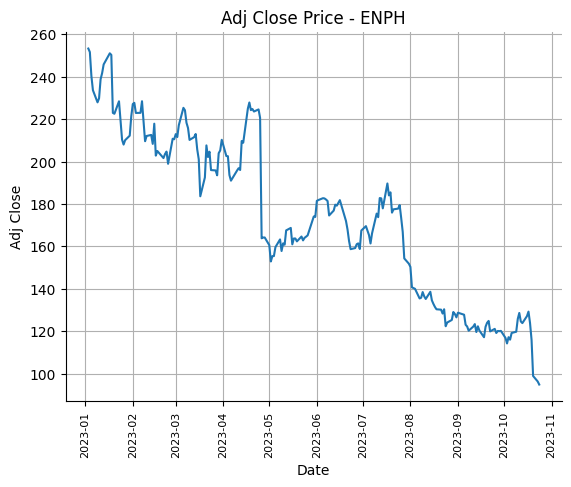

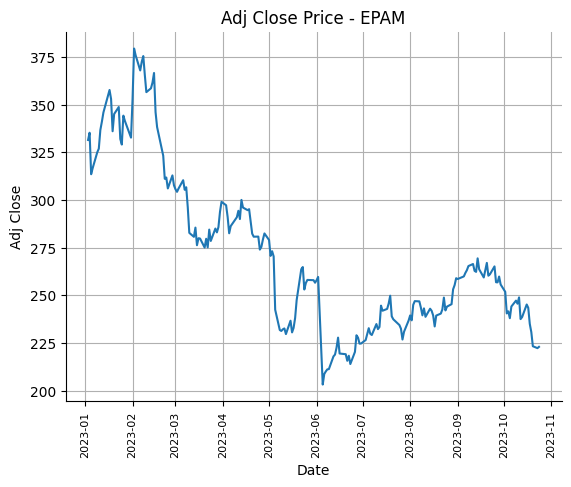

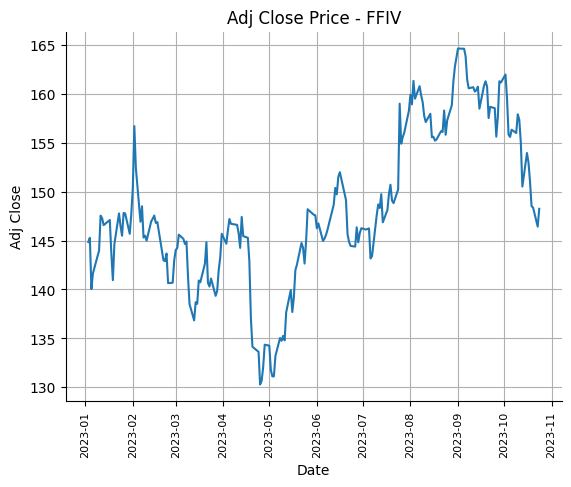

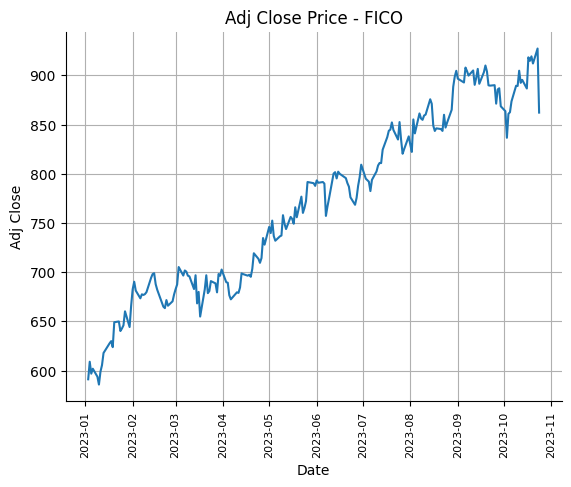

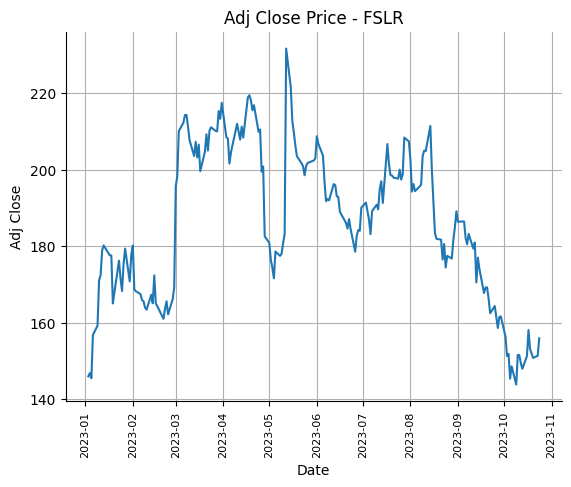

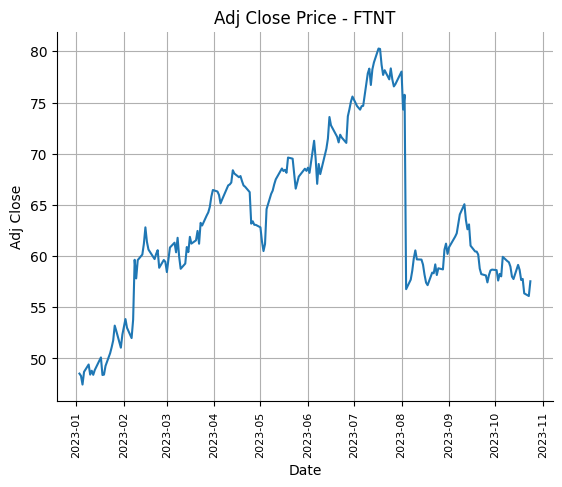

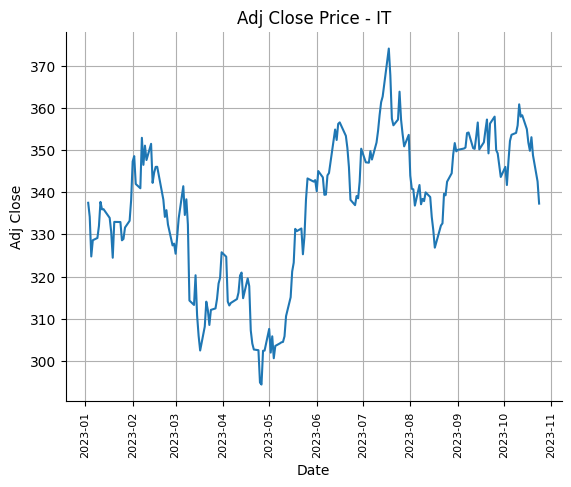

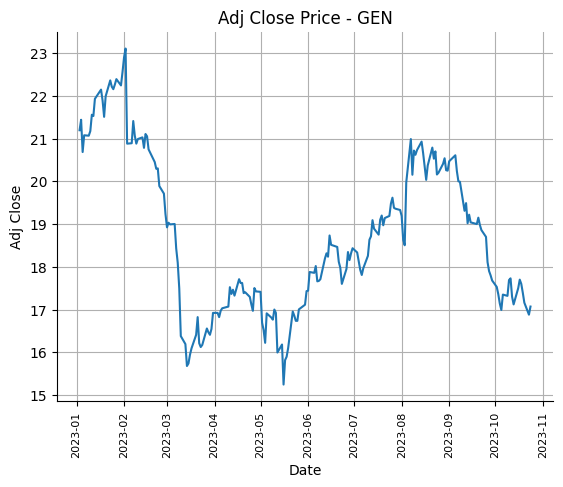

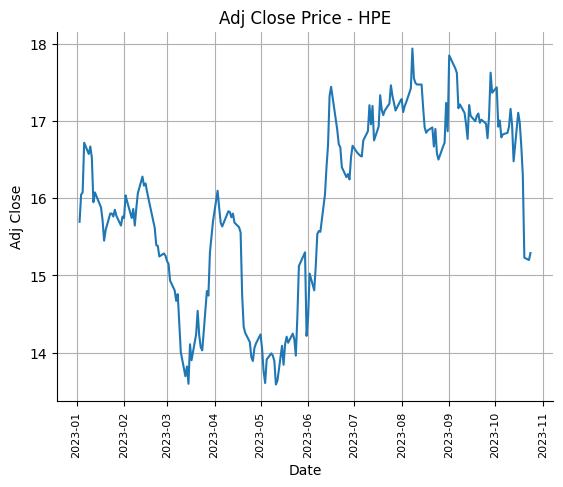

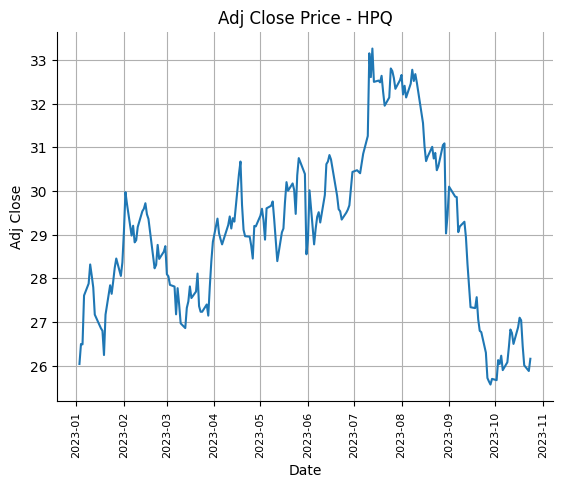

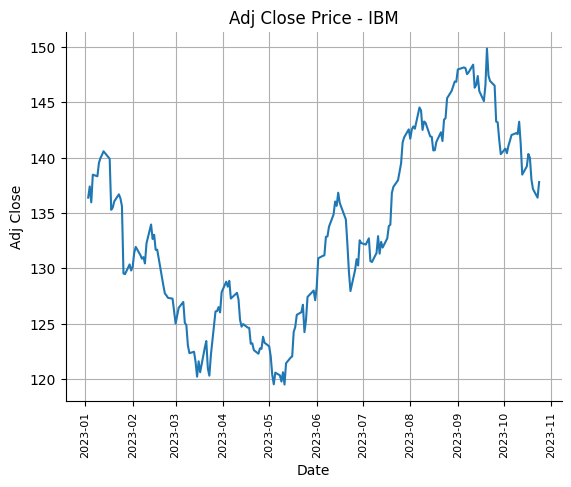

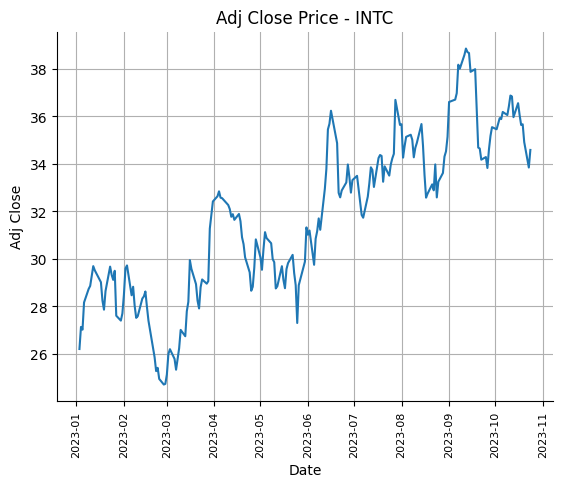

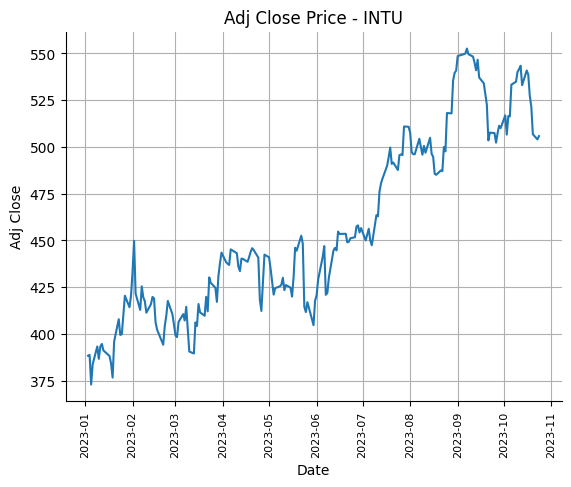

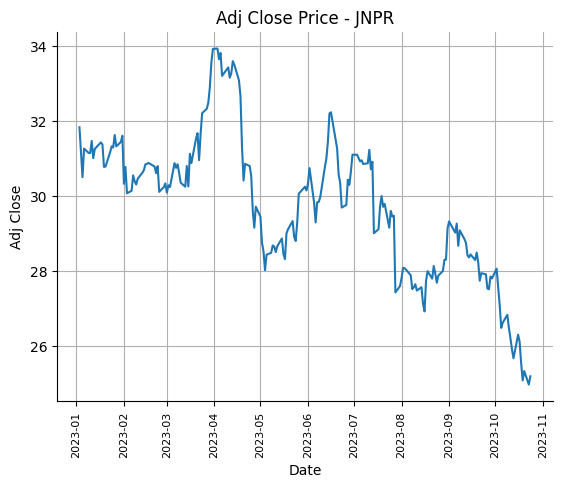

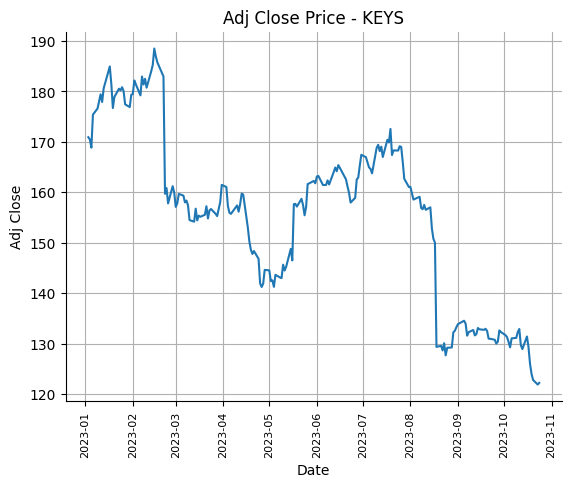

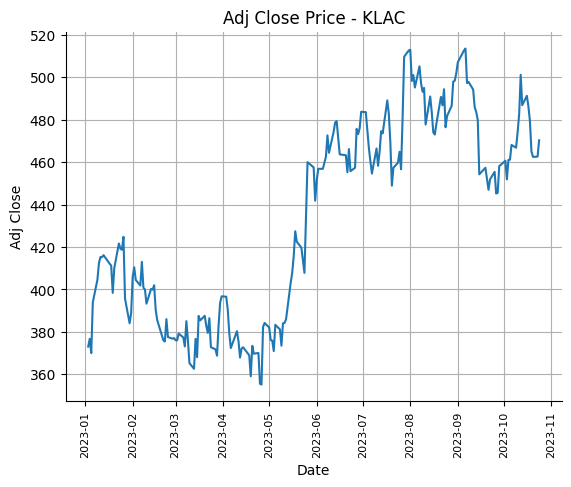

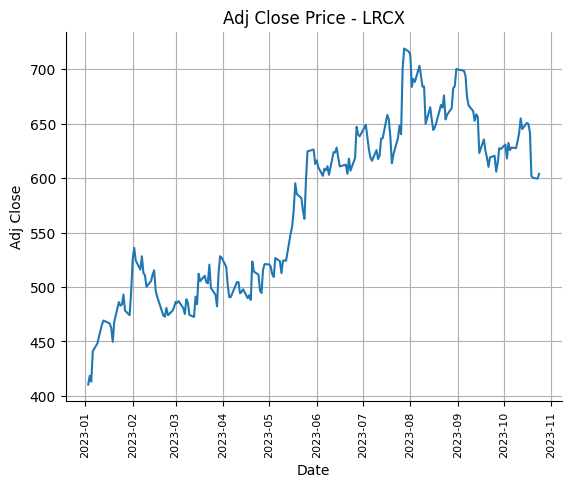

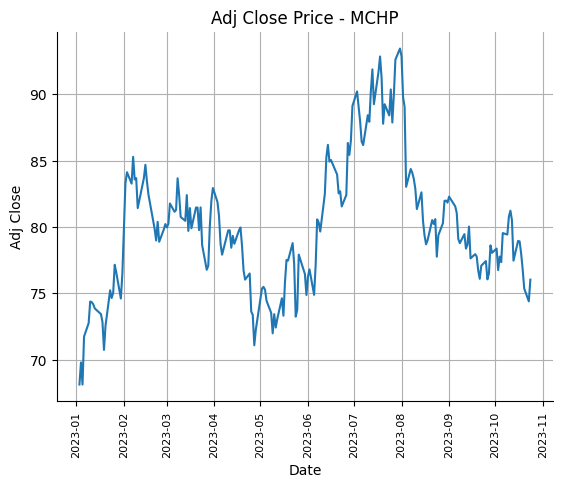

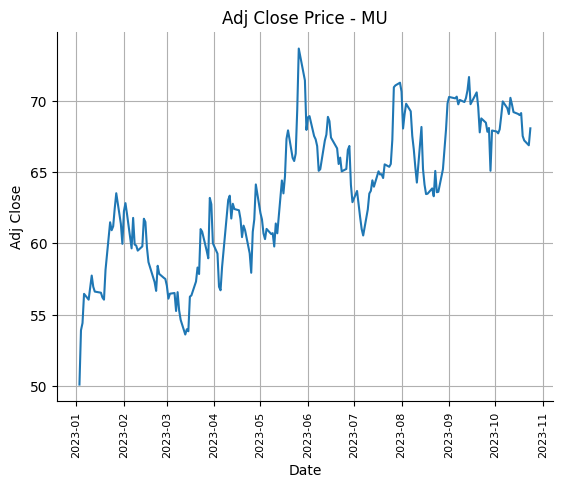

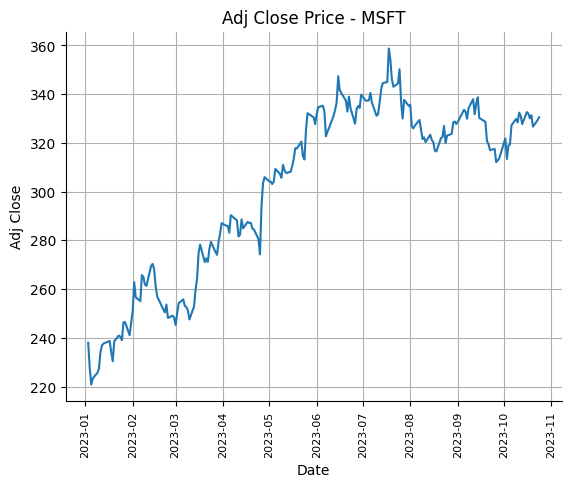

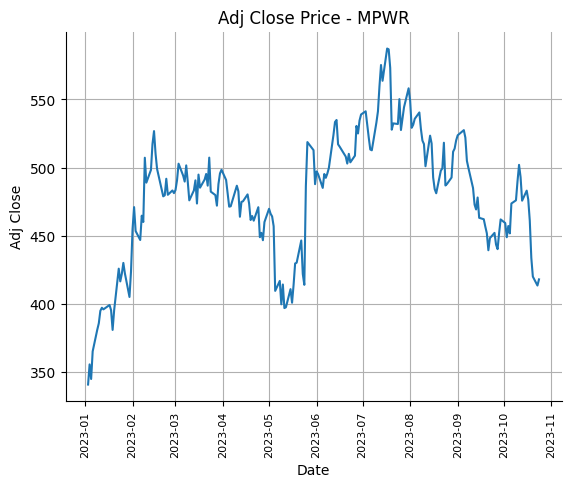

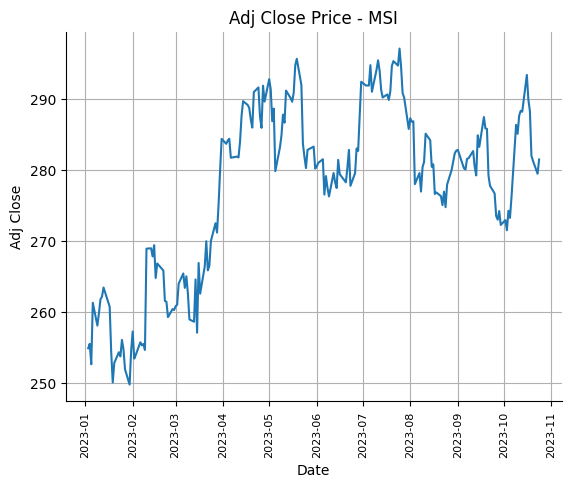

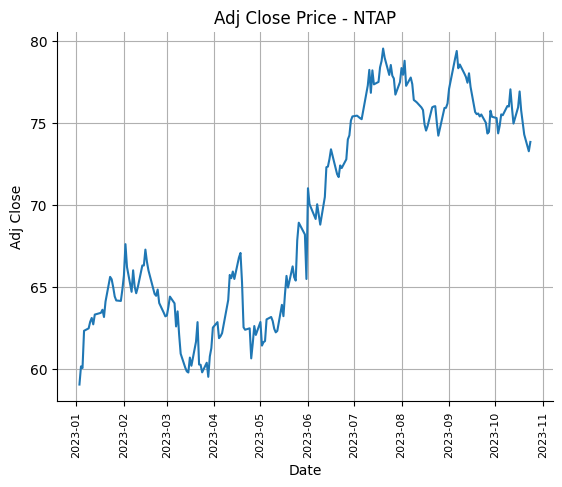

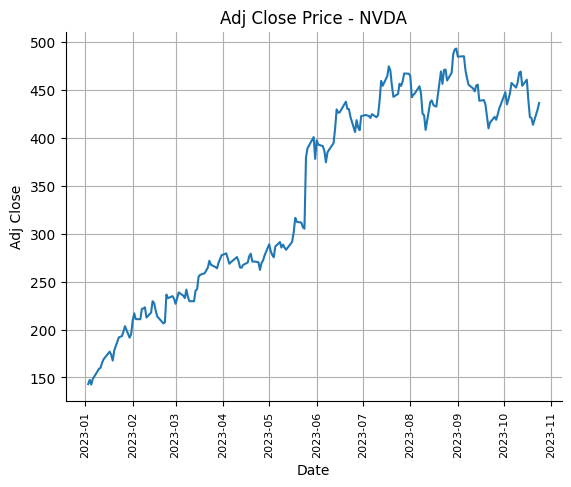

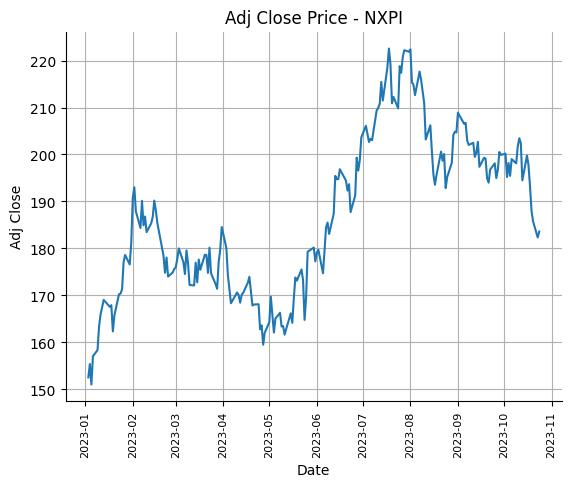

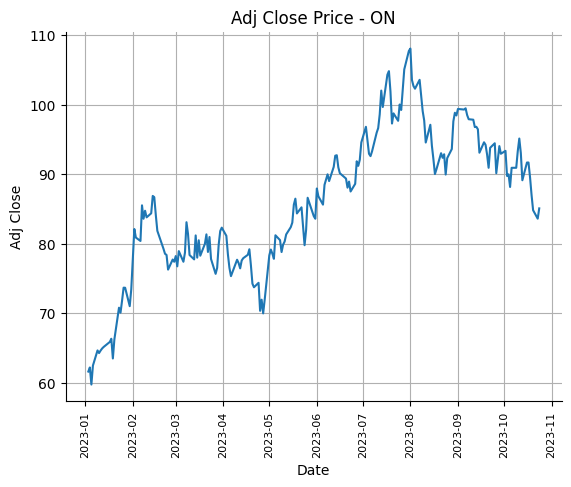

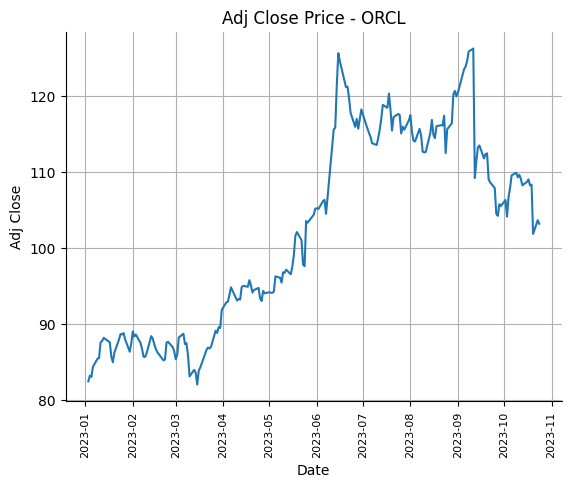

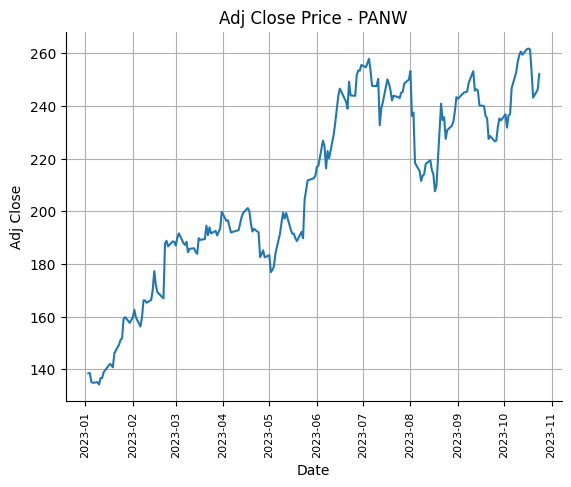

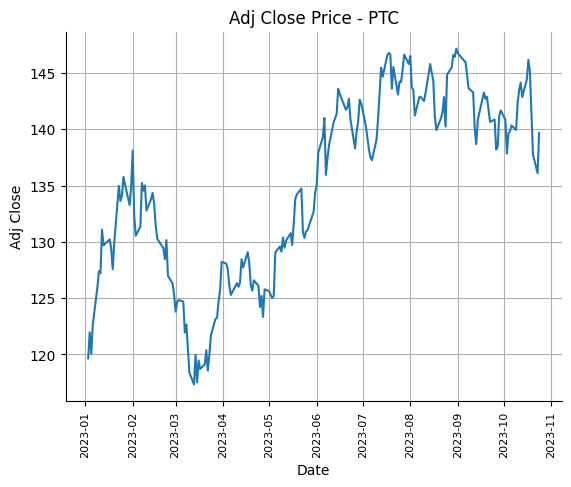

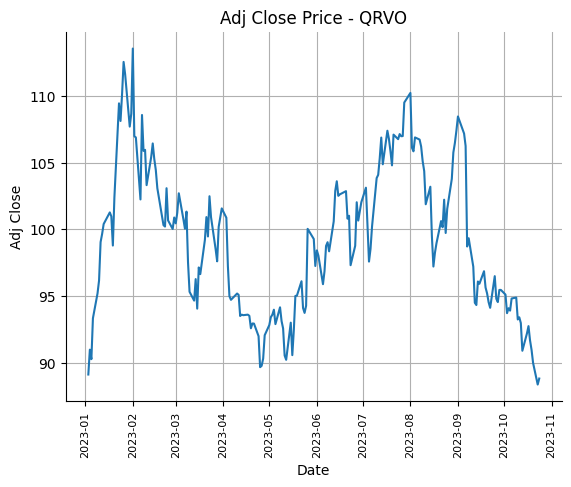

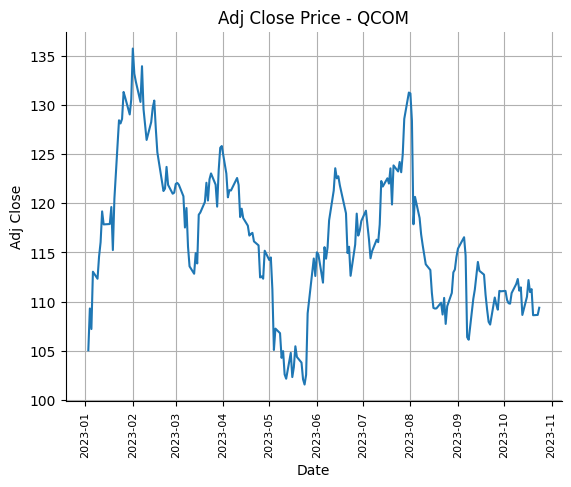

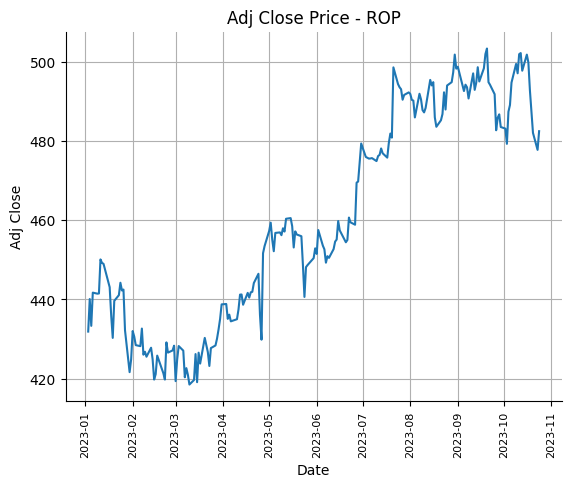

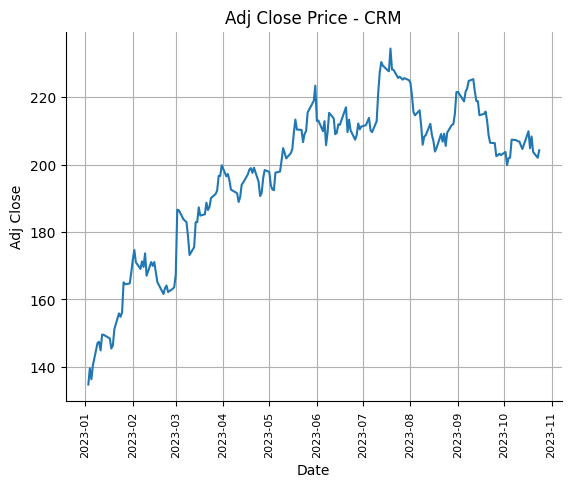

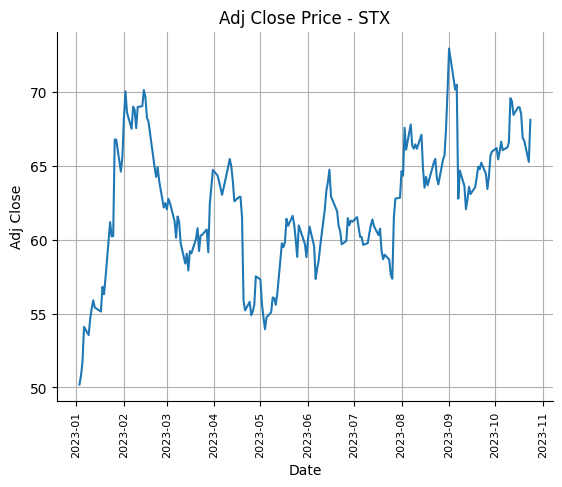

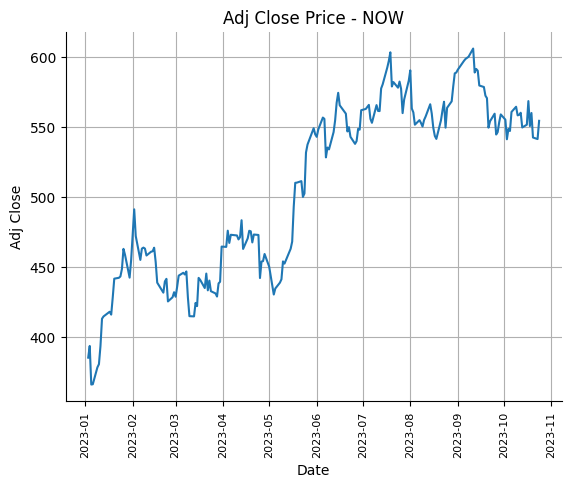

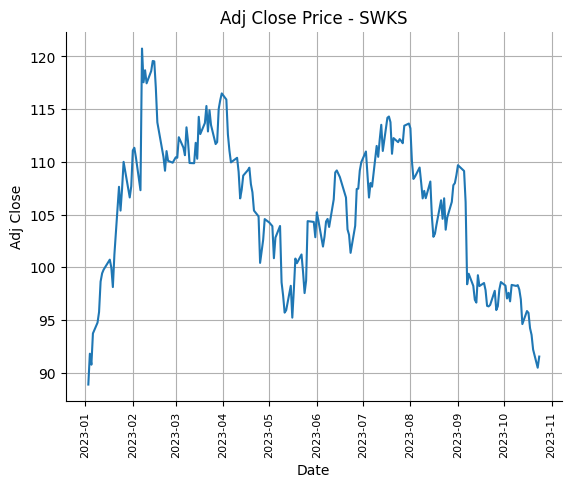

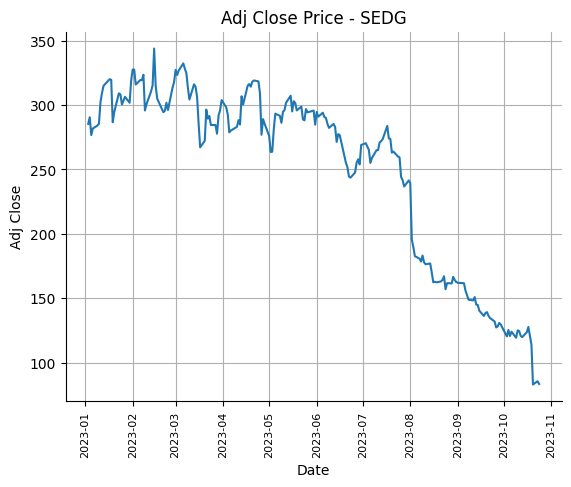

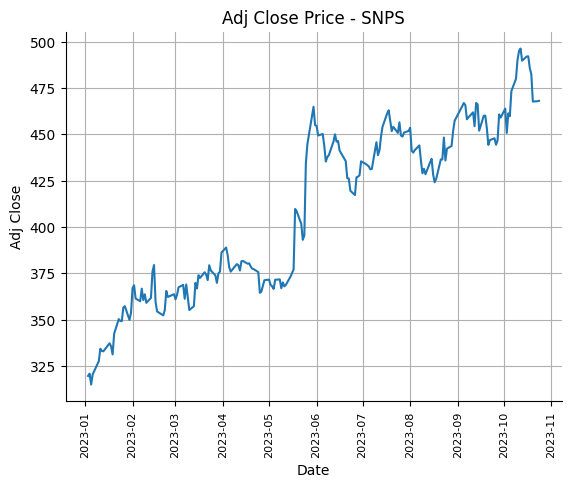

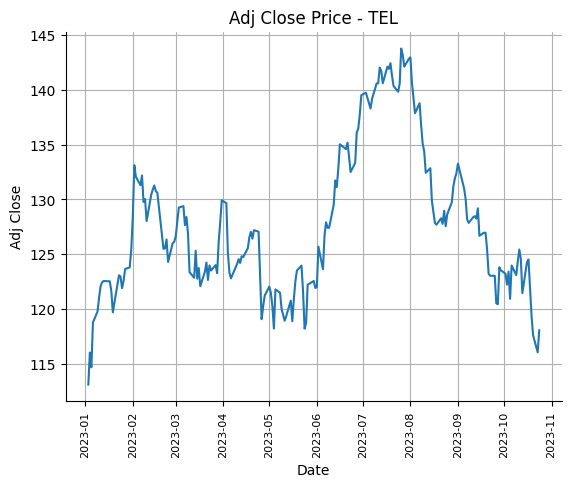

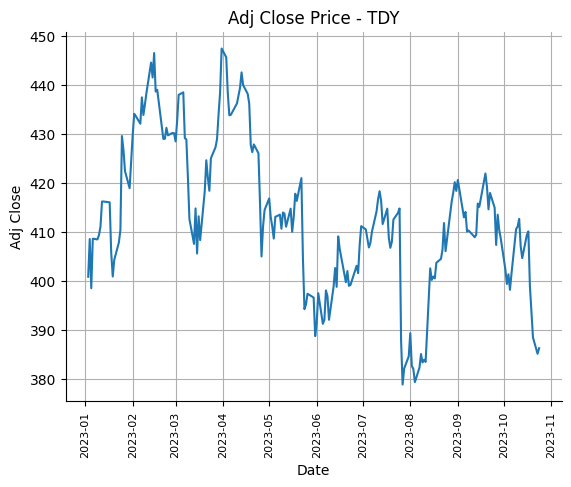

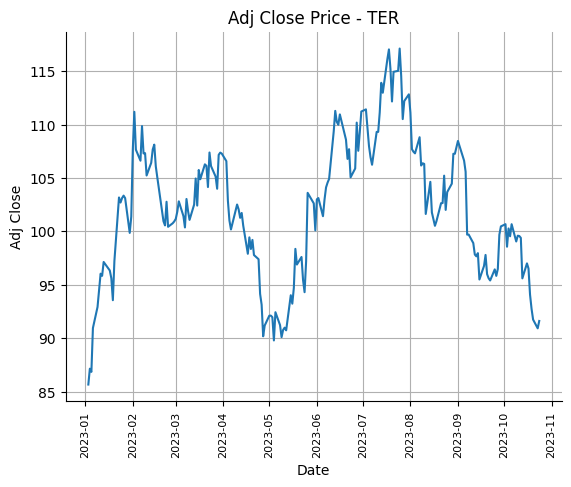

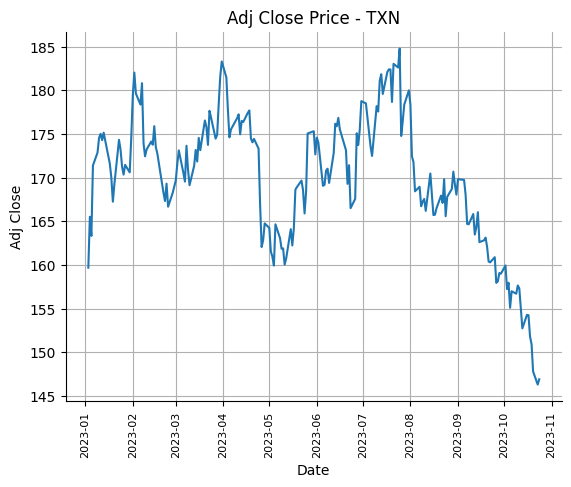

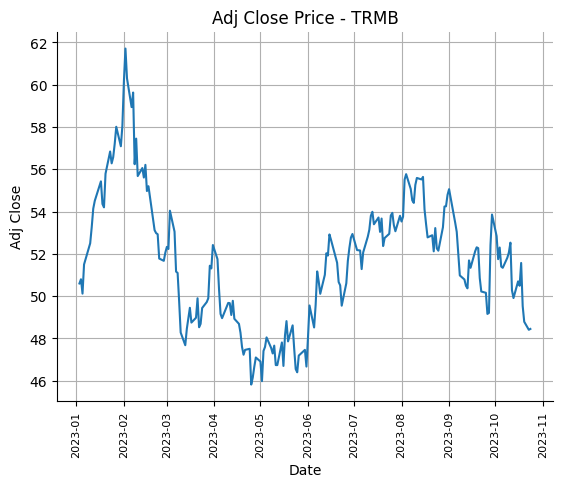

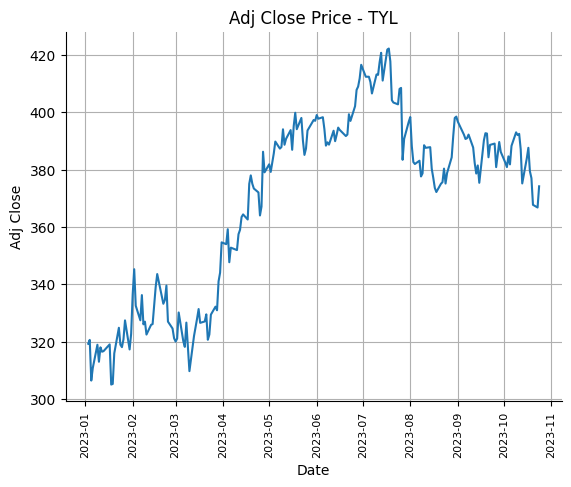

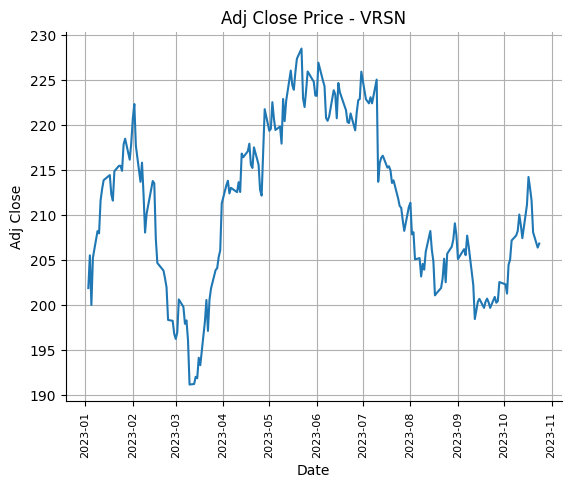

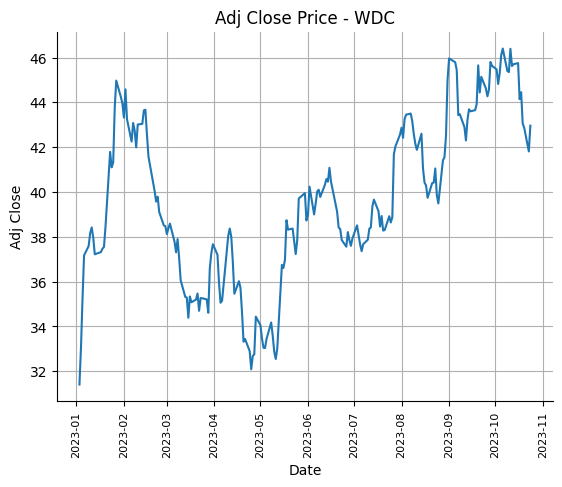

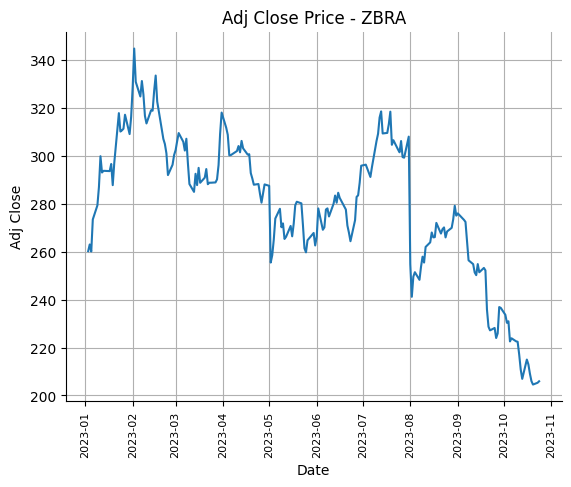

In [10]:
for symbol in sp500.query("GICS_Sector == 'Information Technology'")['Symbol']:
    plot_stock_ticker(symbol,'2023-01-01',end_date_str)
    time.sleep(2)

#### Plotting multiple stock tickers for specific industry ("Industrials")

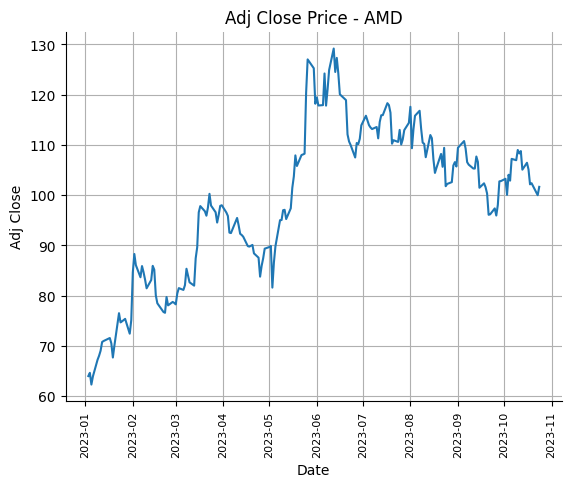

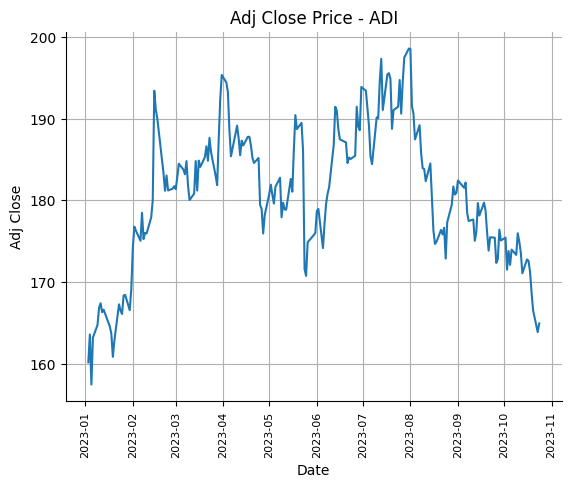

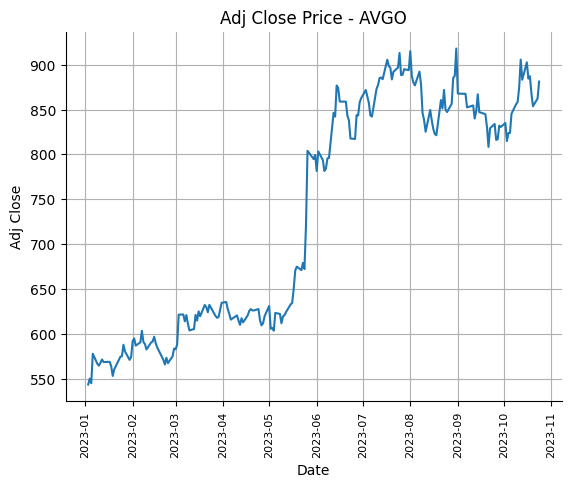

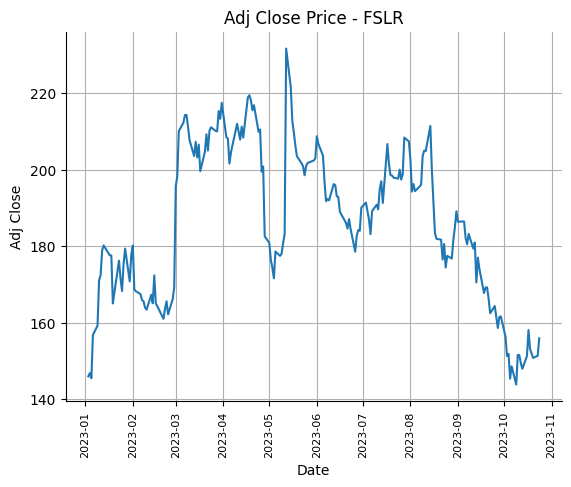

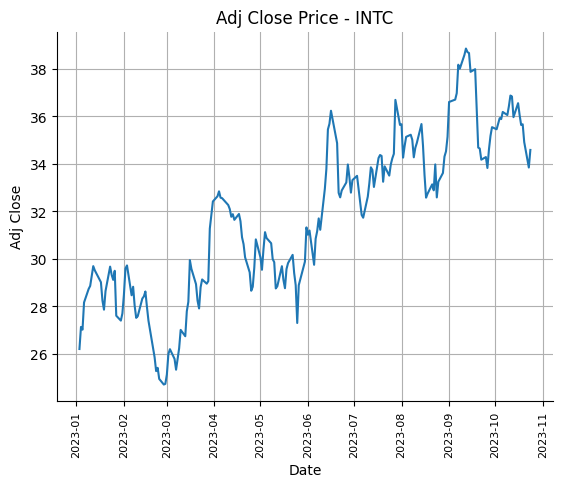

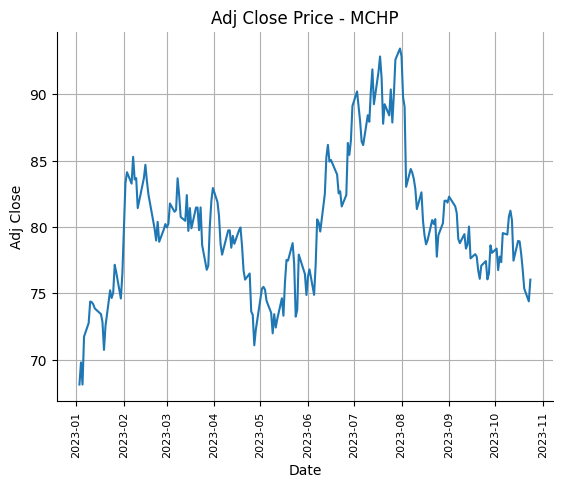

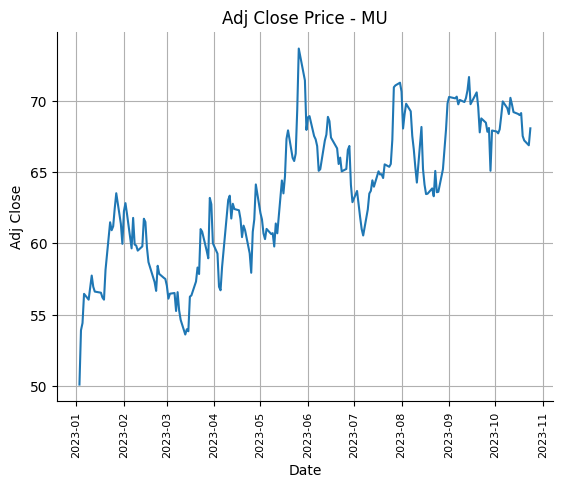

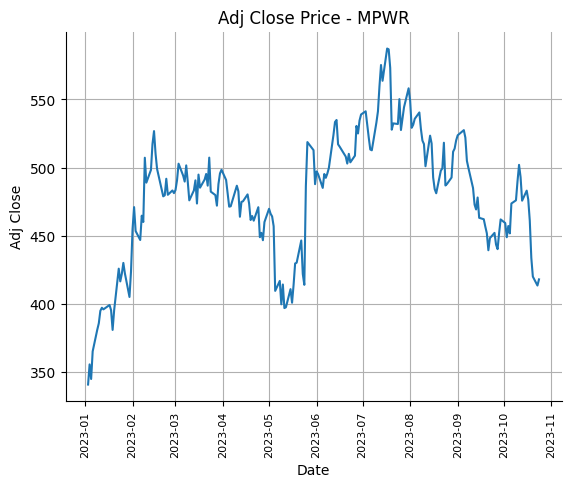

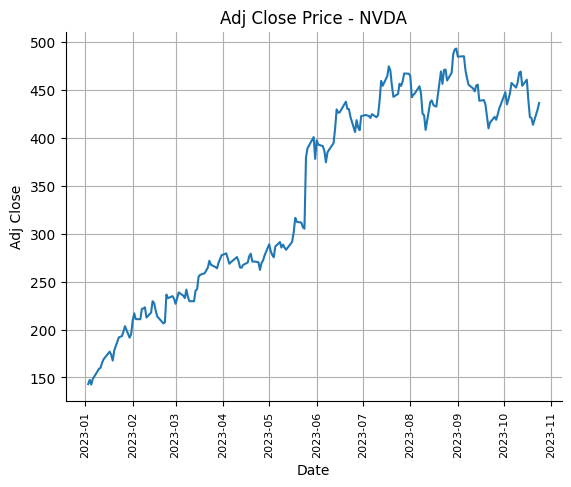

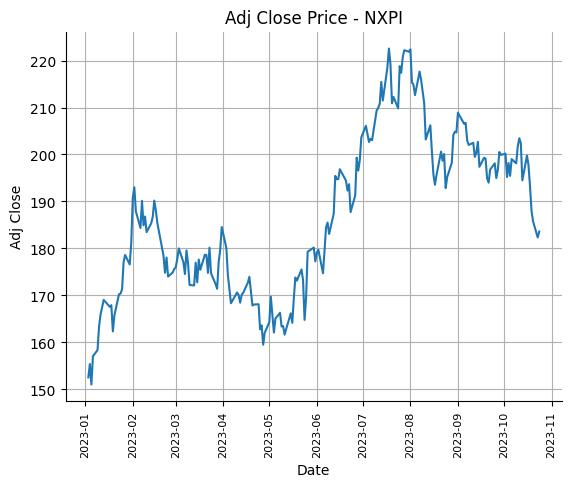

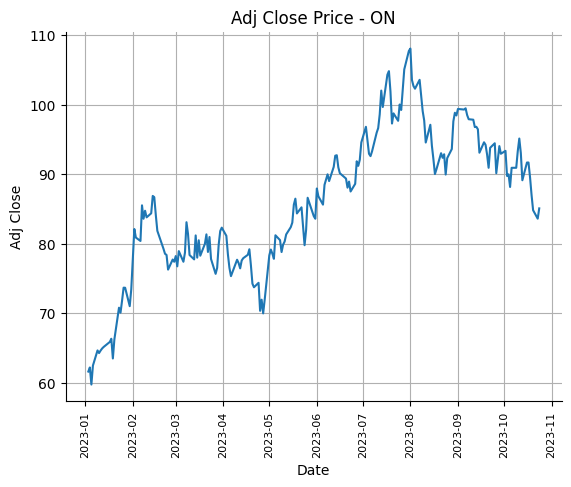

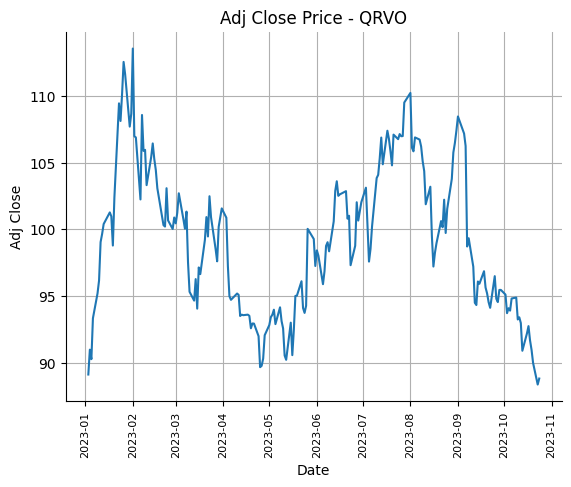

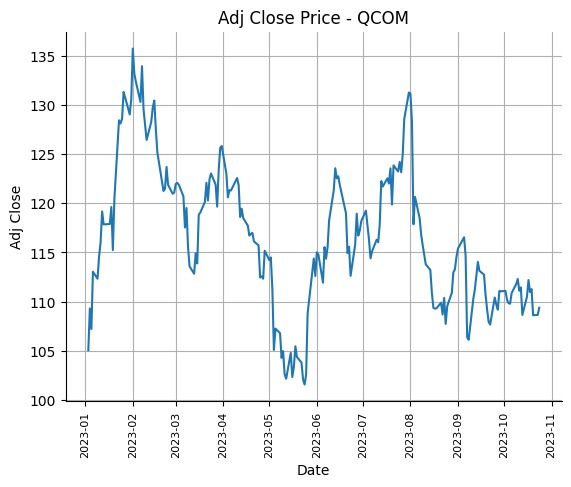

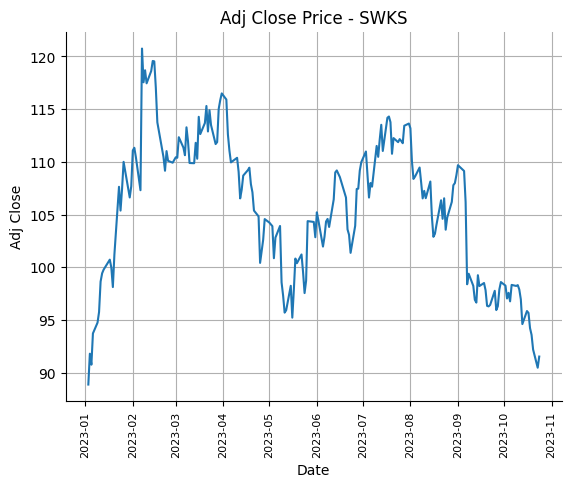

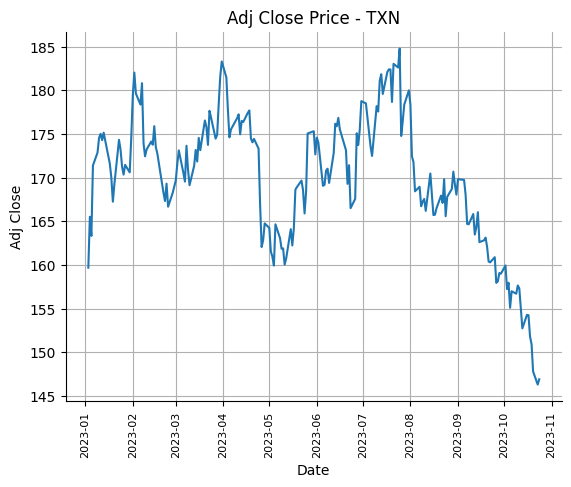

In [11]:
for symbol in sp500.query("GICS_Sub_Industry == 'Semiconductors'")['Symbol']:
    plot_stock_ticker(symbol,'2023-01-01',end_date_str)
    time.sleep(2)

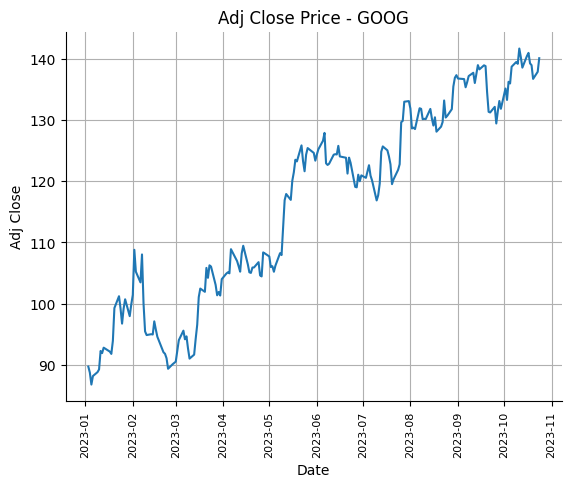

In [15]:
plot_stock_ticker('GOOG','2023-01-01',end_date_str)